In [1]:
import pandas as pd


In [3]:
data=pd.read_excel("/content/sales.csv (1).xlsx")
data

,product,Unite solds,Revenue,date
0,product A,100,5000,2023-01-01
1,product B,85,4500,2023-02-01
2,product C,120,6000,2023-03-01
3,product D,105,5260,2023-04-01
4,product E,92,4600,2023-05-02


In [5]:
data.dropna(inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data.describe()

,Unite solds,Revenue
count,5.000000,5.000000
mean,100.400000,5072.000000
std,13.352902,602.428419
min,85.000000,4500.000000
25%,92.000000,4600.000000
50%,100.000000,5000.000000
75%,105.000000,5260.000000
max,120.000000,6000.000000


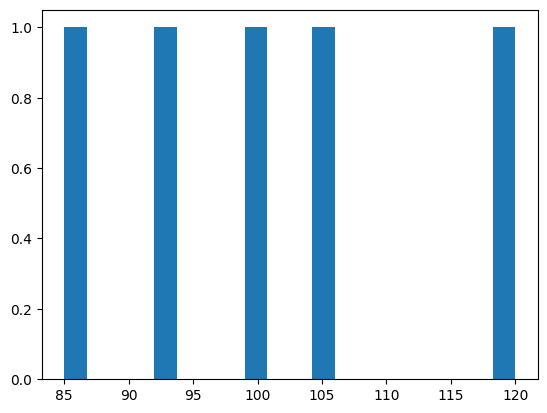

In [12]:
plt.hist(data["Unite solds"],bins=20)
plt.show()

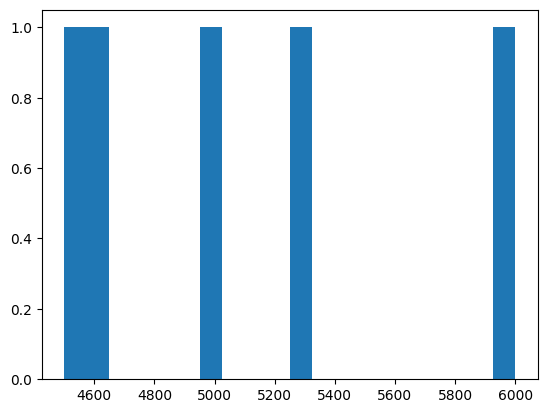

In [13]:
plt.hist(data["Revenue"],bins=20)
plt.show()

In [14]:
data["tatal_sales"]=data["Revenue"]+data["Unite solds"]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data["tatal_sales"]=scaler.fit_10transform(data[["tatal_sales"]])
print(data["tatal_sales"])

0   -0.131480
1   -1.066729
2    1.720859
3    0.349765
4   -0.872415
Name: tatal_sales, dtype: float64


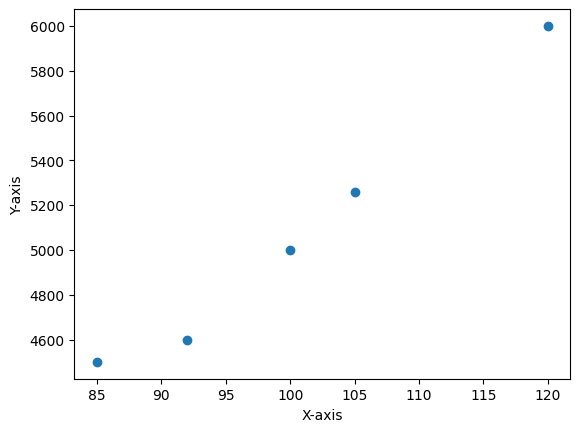

In [19]:
# Scatter plot
plt.scatter(data['Unite solds'], data["Revenue"])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [24]:
from scipy.stats import ttest_ind, pearsonr

# T-test
t_stat, p_value = ttest_ind(data['Unite solds'], data['Revenue'])

# Pearson correlation
correlation_coefficien = pearsonr(data['Unite solds'], data['Revenue'])
print(correlation_coefficien)



PearsonRResult(statistic=0.9900340436769717, pvalue=0.0011925100210595891)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Unite solds']], data['Revenue'], test_size=0.2)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
newdata=pd.Series([7000])
data_pred=pd.DataFrame(newdata,columns=['Revenue'])
model.predict(data_pred)

array([139.93459288])